# Simulated annealing problem for finding global minima on Ackley's function

## Define the probability function 

Simulated annealing (SA) is a method for solving unconstrained and bound-constrained optimization problems. The method models the physical process of heating a material and then slowly lowering the temperature to decrease defects, thus minimizing the system energy.

The temperature of the system reduces over the iterations. The lower temperature the system has, the less probability to pick a worst solution. We consider the probability as: $e^{\frac{current - new}{temperature}}$

In [3]:
def prob(temperature, oldF, newF):
    # The temperature of the system reduces over the iterations. The lower
    # temperature the system has, the less probability to pick a worst solution.
    return np.exp((oldF-newF)/temperature)

## Main code

[  1.02094904e-02  -7.86243756e-03  -3.09388181e-03   8.89727292e-04
  -1.51351647e+00   3.23997248e+02   1.23152789e-02  -4.44518006e-06
   1.02439300e-03   1.20892669e-05] 20.0111049018


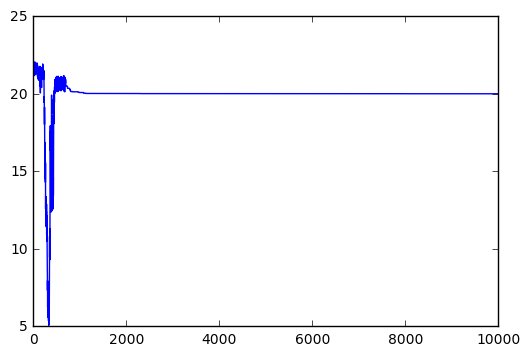

In [10]:
from __future__ import division
from matplotlib.pyplot import *
import numpy as np
import Ackley as ackley

%matplotlib inline

unif = np.random.uniform

# Define the population elements (n), and the lower (l) and upper (u) edges 
# for the exploration
n = 10
l = -32
u = 32

# Initialize vars as the iteration number, parameters for the simulated annealing and
# an array to store the fitness in each iteration
n_iter = 10000
temperature = 1000
alpha = 0.99
vfos = np.empty(0)

# Create the current solution and get its fitness
current_sol = unif(l, u, n)
current_vfo = ackley.evaluate(current_sol)

# Iterate 
for i in range(n_iter):
    # Create a new solution which changes in about 25% of the current one and 
    # compute its fitness
    new_sol = current_sol + 0.25 * current_sol * unif(-1, 1, n)
    new_vfo = ackley.evaluate(new_sol)
    
    # Update the solution and fitness ff the new solution is better than the current
    # or with a probability given by the prob function
    if new_vfo < current_vfo or unif() < prob(temperature, current_vfo, new_vfo):
        current_sol = new_sol
        current_vfo = new_vfo
    
    # Store the fitness and update the temperature
    vfos = np.append(vfos, current_vfo)
    temperature *= alpha
    
# Plot the fitness over time and print the last solution and its fitness
plot(np.arange(n_iter), vfos)
print current_sol, current_vfo